In [26]:
%matplotlib inline
from astropy.table import Table, Column, vstack
from astropy.io import fits
import numpy as N
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import glob
import os

In [27]:
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

font = {'family':'serif', 'size':20}
plt.rc('font', **font)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', labelsize='medium', lw=2, facecolor='None', edgecolor='k')
plt.rc('text', usetex=True)


X = N.linspace(0, 14, 100)
Xs = X[:-1] + N.diff(X)
Y = N.linspace(0, 4, 100)
Ys = Y[:-1] + N.diff(Y)

ti = N.arange(0, 0.01, 0.003)
t = N.linspace(0,14.0,100)
time = N.append(ti, t[1:])

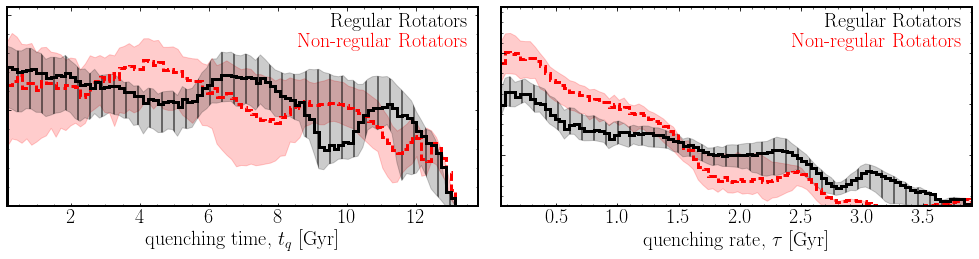

In [177]:
F = plt.figure(figsize=(14,4), edgecolor='None', facecolor='None')
ax1 = plt.subplot2grid((1,2), (0,0))
lowstqg = glob.glob('../data/samples/NSF_MM/SR_*tq*.npy')
xsls = N.array(list(map(N.load, lowstqg)))
maxxsls = N.nanmax(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.nanmin(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('../data/samples/NSF_MM/FR_*tq*.npy')
xdls = N.array(list(map(N.load, lowdtqg)))
maxxdls = N.nanmax(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.nanmin(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Xs, y1=minxsls, y2=maxxsls, color='r', edgecolor='k', alpha=0.2)
ax1.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', hatch='|', alpha=0.2)
xslastq = N.load('../data/samples/NSF_MM/SR_MM_tq_sum_bootstrap_all.npy')
ax1.hist(Xs, weights = xslastq/N.sum(xslastq), bins=Xs, histtype='step', color='r', linestyle='dashed', lw = 3)
xsladtq = N.load('../data/samples/NSF_MM/FR_MM_tq_sum_bootstrap_all.npy')
ax1.hist(Xs, weights = xsladtq/N.sum(xsladtq), bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.15, 13.8)
ax1.tick_params('x', labelbottom='on')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxsls, maxxdls]))
ax1.set_xlabel(r'$\rm{quenching}$ $\rm{time}$, $t_q$ [Gyr]')
ax1.minorticks_on()
ax1.text(0.98, 0.9, r'$\rm{Regular}$ $\rm{Rotators}$', color='k', ha='right', transform=ax1.transAxes)
ax1.text(0.98, 0.8, r'$\rm{Non}$-$\rm{regular}$ $\rm{Rotators}$', color='r', ha='right', transform=ax1.transAxes)
ax1.tick_params(axis='both', which='both', direction='in', top='on', right='on')

ax4 = plt.subplot2grid((1,2), (0,1))
lowstqg = glob.glob('../data/samples/NSF_MM/SR_*tau*.npy')
xsls = N.array(list(map(N.load, lowstqg)))
maxxsls = N.nanmax(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.nanmin(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('../data/samples/NSF_MM/FR_*tau*.npy')
xdls = N.array(list(map(N.load, lowdtqg)))
maxxdls = N.nanmax(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.nanmin(xdls.T/N.sum(xdls, axis=1), axis=1)
ax4.fill_between(Ys, y1=minxsls, y2=maxxsls, color='r', edgecolor='k', alpha=0.2)
ax4.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', hatch='|', alpha=0.2)
xshastq = N.load('../data/samples/NSF_MM/SR_MM_smooth_tau_sum_bootstrap_all.npy')
ax4.hist(Ys, weights = xshastq/N.sum(xshastq), bins=Ys, histtype='step', color='r', linestyle='dashed', lw = 3)
xshadtq = N.load('../data/samples/NSF_MM/FR_MM_smooth_tau_sum_bootstrap_all.npy')
ax4.hist(Ys, weights = xshadtq/N.sum(xshadtq), bins=Ys, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.05, 3.9)
ax4.set_ylim(0, 1.15*N.max([maxxsls, maxxdls]))
#ax4.set_ylim(0, 0.15)
ax4.tick_params('both', labelbottom='on', labelleft='off')
ax4.set_xlabel(r'$\rm{quenching}$ $\rm{rate}$, $\tau$ [Gyr]')
ax4.minorticks_on()
ax4.text(0.98, 0.9, r'$\rm{Regular}$ $\rm{Rotators}$', color='k', ha='right', transform=ax4.transAxes)
ax4.text(0.98, 0.8, r'$\rm{Non}$-$\rm{regular}$ $\rm{Rotators}$', color='r', ha='right', transform=ax4.transAxes)
ax4.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
ax4.tick_params(axis='both', which='both', direction='in', top='on', right='on')


plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.0)
plt.savefig('../figures/quenching_time_rate_FR_SR_NSF_1sigma_C16_MM.pdf', edgecolor='None', facecolor='None', bbox_inches='tight')

In [178]:
rrs = xshadtq/N.sum(xshadtq)

In [179]:
N.sum(maxxdls[N.where(Ys > 2.0)])/N.sum(maxxdls) - N.sum(rrs[N.where(Ys > 2.0)])/N.sum(rrs)

0.012469678478860158

In [180]:
N.sum(rrs[N.where(Ys > 2.0)])/N.sum(rrs)

0.26865890389698632

In [181]:
N.sum(rrs[N.where(Ys > 2.0)])/N.sum(rrs) - N.sum(minxdls[N.where(Ys > 2.0)])/N.sum(minxdls)

0.088021856630636164

### So 27±_{9}^{1} % of the regular rotator population SFH history distribution lies at rates > 2 Gyr. 

In [182]:
from scipy.stats import anderson_ksamp
from scipy.special import erfinv

In [184]:
data = Table.read('../data/gz2-galex-manga-3-arcsec-lamr_all_best_fit_t_tau_mpa_jhu_1sigma_NSF_mass_matched_fast_to_slow.fits', format='fits')
NRR = data[data['FvS']==0]
RR = data[data['FvS']==1]

In [185]:
anderson_ksamp([NRR['best fit t'], RR['best fit t']])

/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1685: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=-0.33384379086970062, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.49406833854680327)

So going off what this[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson_ksamp.html] says we cannot reject the null hypothesis since p = 0.49. 

In [186]:
anderson_ksamp([NRR['best fit tau'], RR['best fit tau']])

/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1685: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=8.5025862165357484, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.0003124006754315777)

In [187]:
N.sqrt(2)*erfinv(1-0.0003124006754315777)

3.6047939568996781

So this means we can reject the null hypothesis that the two samples quench at the same rate as our statistic is greater than the 1% critical value. In fact, this is a 3.6 sigma result. 

### Time of quenching considerations 

For slow rotators the peak quenching time occured at ~ 4 Gyr - or a redshift of z ~ 1.7. The peak of the SFRD in the Universe occurs at z~2 and so this peak in the quenching time for fast rotators coincides with the decline in the SFRD of the Universe. For fast rotators however, the peak of the quenching time occured at ~ 6 Gyr - or a redshift of z ~ 1

In [144]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)

In [152]:
cosmo.age(1.65)

<Quantity 4.069301859664624 Gyr>

### What about if we put a 3sigma cut on the distance from the SFS...

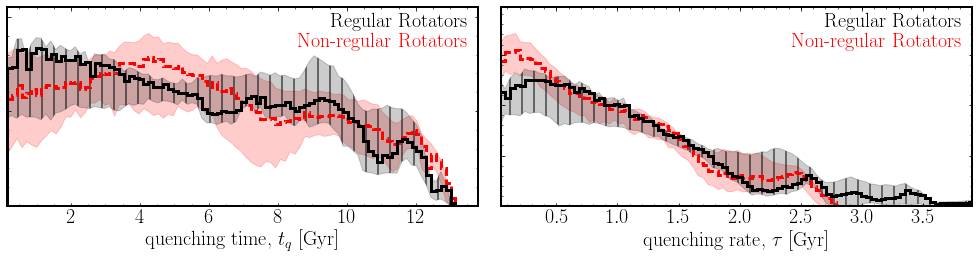

In [170]:
F = plt.figure(figsize=(14,4), edgecolor='None', facecolor='None')
ax1 = plt.subplot2grid((1,2), (0,0))
lowstqg = glob.glob('../data/samples/NSF_3s_MM/SR_*tq*.npy')
xsls = N.array(list(map(N.load, lowstqg)))
maxxsls = N.nanmax(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.nanmin(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('../data/samples/NSF_3s_MM/FR_*tq*.npy')
xdls = N.array(list(map(N.load, lowdtqg)))
maxxdls = N.nanmax(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.nanmin(xdls.T/N.sum(xdls, axis=1), axis=1)
ax1.fill_between(Xs, y1=minxsls, y2=maxxsls, color='r', edgecolor='k', alpha=0.2)
ax1.fill_between(Xs, y1=minxdls, y2=maxxdls, color='k', hatch='|', alpha=0.2)
xslastq = N.load('../data/samples/NSF_3s_MM/SR_MM_tq_sum_bootstrap_all.npy')
ax1.hist(Xs, weights = xslastq/N.sum(xslastq), bins=Xs, histtype='step', color='r', linestyle='dashed', lw = 3)
xsladtq = N.load('../data/samples/NSF_3s_MM/FR_MM_tq_sum_bootstrap_all.npy')
ax1.hist(Xs, weights = xsladtq/N.sum(xsladtq), bins=Xs, histtype='step', color='k', lw = 3)
ax1.set_xlim(0.15, 13.8)
ax1.tick_params('x', labelbottom='on')
ax1.tick_params('y', labelleft='off')
ax1.set_ylim(0, 1.15*N.max([maxxsls, maxxdls]))
ax1.set_xlabel(r'$\rm{quenching}$ $\rm{time}$, $t_q$ [Gyr]')
ax1.minorticks_on()
ax1.text(0.98, 0.9, r'$\rm{Regular}$ $\rm{Rotators}$', color='k', ha='right', transform=ax1.transAxes)
ax1.text(0.98, 0.8, r'$\rm{Non}$-$\rm{regular}$ $\rm{Rotators}$', color='r', ha='right', transform=ax1.transAxes)
ax1.tick_params(axis='both', which='both', direction='in', top='on', right='on')

ax4 = plt.subplot2grid((1,2), (0,1))
lowstqg = glob.glob('../data/samples/NSF_3s_MM/SR_*tau*.npy')
xsls = N.array(list(map(N.load, lowstqg)))
maxxsls = N.nanmax(xsls.T/N.sum(xsls, axis=1), axis=1)
minxsls = N.nanmin(xsls.T/N.sum(xsls, axis=1), axis=1)
lowdtqg = glob.glob('../data/samples/NSF_3s_MM/FR_*tau*.npy')
xdls = N.array(list(map(N.load, lowdtqg)))
maxxdls = N.nanmax(xdls.T/N.sum(xdls, axis=1), axis=1)
minxdls = N.nanmin(xdls.T/N.sum(xdls, axis=1), axis=1)
ax4.fill_between(Ys, y1=minxsls, y2=maxxsls, color='r', edgecolor='k', alpha=0.2)
ax4.fill_between(Ys, y1=minxdls, y2=maxxdls, color='k', hatch='|', alpha=0.2)
xshastq = N.load('../data/samples/NSF_3s_MM/SR_MM_smooth_tau_sum_bootstrap_all.npy')
ax4.hist(Ys, weights = xshastq/N.sum(xshastq), bins=Ys, histtype='step', color='r', linestyle='dashed', lw = 3)
xshadtq = N.load('../data/samples/NSF_3s_MM/FR_MM_smooth_tau_sum_bootstrap_all.npy')
ax4.hist(Ys, weights = xshadtq/N.sum(xshadtq), bins=Ys, histtype='step', color='k', lw = 3)
ax4.set_xlim(0.05, 3.9)
ax4.set_ylim(0, 1.15*N.max([maxxsls, maxxdls]))
#ax4.set_ylim(0, 0.15)
ax4.tick_params('both', labelbottom='on', labelleft='off')
ax4.set_xlabel(r'$\rm{quenching}$ $\rm{rate}$, $\tau$ [Gyr]')
ax4.minorticks_on()
ax4.text(0.98, 0.9, r'$\rm{Regular}$ $\rm{Rotators}$', color='k', ha='right', transform=ax4.transAxes)
ax4.text(0.98, 0.8, r'$\rm{Non}$-$\rm{regular}$ $\rm{Rotators}$', color='r', ha='right', transform=ax4.transAxes)
ax4.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
ax4.tick_params(axis='both', which='both', direction='in', top='on', right='on')


plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.0)
plt.savefig('../figures/quenching_time_rate_FR_SR_NSF_3sigma_C16_MM.pdf', edgecolor='None', facecolor='None', bbox_inches='tight')

In [190]:
data = Table.read('../data/gz2-galex-manga-3-arcsec-lamr_all_best_fit_t_tau_mpa_jhu_3sigma_NSF_mass_matched_fast_to_slow.fits', format='fits')
NRR3s = data[data['FvS']==0]
RR3s = data[data['FvS']==1]

In [191]:
anderson_ksamp([NRR3s['best fit t'], RR3s['best fit t']])

/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1685: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=-0.50626466407800552, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.593298376746844)

So ths means we cannot reject the null hypothesis that the two samples quench at the same time, p = 0.59. 

In [192]:
anderson_ksamp([NRR3s['best fit tau'], RR3s['best fit tau']])

/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1685: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=10.932734075889853, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=8.235701878330942e-05)

In [193]:
N.sqrt(2)*erfinv(1-8.235701878330942e-05)

3.9374356173359044

So this means we can reject the null hypothesis that the two samples quench at the same rate as our statistic is greater than the 1% critical value. In fact, this is a 3.9 sigma result. 